<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_Etivity-3


In [1]:
#@title Current Date
from datetime import date

Today = "2021-08-09" #@param {type:"date"}
print('Today is the %s'%(Today))

Today is the 2021-08-09


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = '0427845' #@param {type:"string"}
Student_full_name = 'Alison O''Connor' #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# Etivity-3

1. Fuzzy System

    Using el notebook RepMLA_3_1.ipynb as a baseline, solve the following task

    Antecedents: 
        Fuzzy triangular sets for 'service': unacceptable, poor, acceptable, good, amazing
        Fuzzy trapezoidal sets for 'quality': really_bad, bad, decent, great, really_great

    Consequents:
        Fuzzy Gaussian sets for 'tip': very_low, low, medium, high, very_high
        Design 5 rules using the antecedent and consequents
        Give 5 examples of usage, for instance, from the notebook; the service as 9.8, and the quality as 6.5 
        
        
2. Fuzzy Classification

    Using the notebook RepMLA_3_2.ipynb as a baseline, solve the following task 
    Consider all the features: ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

    Perform a binary classification problem considering:
         'Iris-setosa' , 'Iris-versicolor' 
        'Iris-versicolor' , 'Iris-virginica'
         'Iris-setosa' , 'Iris-virginica'
    Perform a multi-classification problem considering:
        'Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica'
        Fuzzy C-means clustering

3. Using el notebook RepMLA_3_3.ipynb as a baseline, solve the following task 
    Design 3 clustering problems using 500 data points and use the fuzzy partition coefficient (FPC) from 2 to 15 clusters.
    These are the problems
        Clustering problem 1 with 4 clusters
        Clustering problem 2 with 6 clusters
        Clustering problem 3 with 8 clusters

# 1. Fuzzy systems

## Introduction

Here we are going to look at Fuzzy systems using the tipping problem to illustrate fuzzy logic. Imagine you and a group of 10 friends are at a restaurant and want to leave a tip between 0-25%. This is obviously pre-covid because now we can't have more than five friends for dinner! You really enjoyed your meal and felt like both the service and food were good. Some of your friends felt like the food was only OK but service was good. Two people didn't get their meal for 15 min after everyone else they felt like service was bad but food was good. One friend had a massive argument with the server and didn't like the food or the service. Fuzzy systems offer us a way to be able to quantify the 'truthfullness' of an issue over a continuum, where the continuum can be, for example, the groups overall assessment of how 'good' or 'bad' service/food was based on each individuals experience. 
<br>
A fuzzy variable has a 'crisp' value, several descriptive terms and a membership function. The crisp value is a real number that describes how we think of the variable mathematically. The descriptive terms might be 'bad', 'good', 'excellent'. These terms together as a group are called the fuzzy set. The membership function defines how the crisp value is mapped to the fuzzy set on a scale of 0-1. In other words the membership function describes how 'good' or 'bad' something is. 
<br>
A fuzzy control system links the fuzzy variables using a set of rules. The rules control how each fuzzy variable relates to another fuzzy variable within the fuzzy set. The rules are generally arranged as 'if' 'then' statements of 'if' x is true then do Y. [Here](https://pythonhosted.org/scikit-fuzzy/userguide/fuzzy_control_primer.html) is a good breakdown of fuzzy systems. 



## Import modules

In [4]:
##Import relevant modules
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5dd9475926b54f8289800b02e7b58476158d330a35cadba408f7b52e3054c434
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


## Define the boundary of the problem

For our problem lets assume that everyone at dinner has been asked to rate both the service and the quality on a scale of 0-10. Our tip will be in the range of 0-25%. 

This defines the 'universe' or the boundary within which our fuzzy logic should be applied. 

In [5]:
##Universe variables

##service
service=ctrl.Antecedent(np.arange(0,11, 1), 'service')

##quality
quality=ctrl.Antecedent(np.arange(0,11, 1), 'quality')

##tip
tip=ctrl.Consequent(np.arange(0, 26, 1), 'tip')

We now introdcue our membership function generators. Let's choose three parameters 'bad', 'good', 'excellent' in the case of serivce and quality and, 'low', 'medium', 'high' in the case of our tip. 

In [6]:
#Here we set the membership function for the service
service['unacceptable'] = fuzz.trimf(service.universe, [0, 0, 3])
service['poor'] = fuzz.trimf(service.universe, [2, 5, 5])
service['acceptable'] = fuzz.trimf(service.universe, [3, 7, 7])
service['good'] = fuzz.trimf(service.universe, [5, 9, 9])
service['amazing'] = fuzz.trimf(service.universe, [7, 10, 10])

#Here we set the membership function for the quality
quality['really_bad'] = fuzz.trapmf(quality.universe, [0, 1, 2, 2])
quality['bad'] = fuzz.trapmf(quality.universe, [1, 3, 4, 5])
quality['decent'] = fuzz.trapmf(quality.universe, [4, 5, 6, 7])
quality['great'] = fuzz.trapmf(quality.universe, [6, 7, 8, 10])
quality['really_great'] = fuzz.trapmf(quality.universe, [8, 9, 10, 10])

#Here we set the membership function for the tip
tip['very_low'] = fuzz.gaussmf(tip.universe, 2.5, 1)
tip['low'] = fuzz.gaussmf(tip.universe, 7, 1)
tip['medium'] = fuzz.gaussmf(tip.universe, 10, 1)
tip['high'] = fuzz.gaussmf(tip.universe, 15, 2)
tip['very_high'] = fuzz.gaussmf(tip.universe, 20, 1.0)

## Visualise the boundary
Now we will view the membership functions so we can see where the boundaries of each descriptive technique lies. 

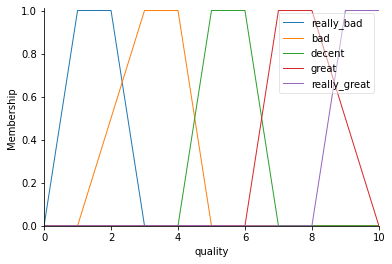

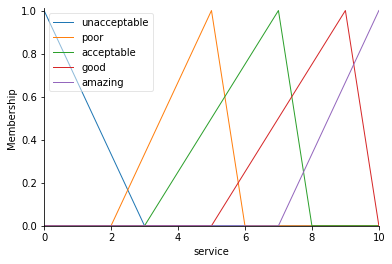

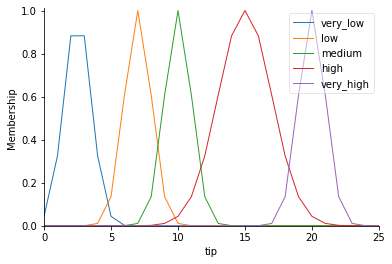

In [7]:
quality.view()
service.view()
tip.view()

## Set the rules

Now we define the rules that control how the boundary of the problem relates to the universe
<br>
1. If the quality is really bad or service is unacceptable then tip will be low
2. If the service is acceptable then the tip will be medium
3. If the quality is really great or service is amazing the tip will be high

In [8]:
rule1=ctrl.Rule(quality['really_bad'] | service['unacceptable'], tip['low'])
rule2=ctrl.Rule(service['acceptable'], tip['medium'])
rule3=ctrl.Rule(quality['really_great'] | service['amazing'], tip['high'])

Lets see what these rules look like

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7ad40a1350>)

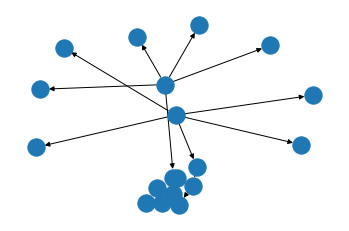

In [9]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7acbb2acd0>)

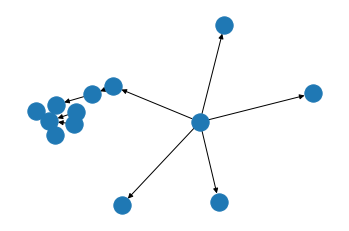

In [10]:
rule2.view()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7acbaf5850>)

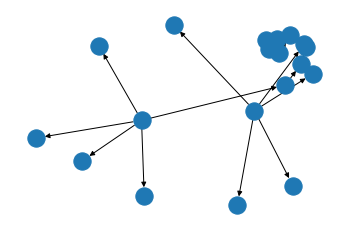

In [11]:
rule3.view()

## Defining the control system

Here we define the control system that applies the rules to our tipping problem

In [12]:
tipping_ctrl=ctrl.ControlSystem([rule1, rule2, rule3])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

Lets gather each our ten dinner members scores on quality and service. The dictionary key is each indivdual while the dictionary value is a list of scores on 'quality' and 'service.

In [13]:
dic={'1':[5, 0],
    '2':[3, 0],
    '3':[7, 0],
    '4':[8, 5],
    '5':[2, 5],
    '6':[6, 8],
    '7':[7, 7],
    '8':[9, 9],
    '9':[4, 4],
    '10':[5, 6]}

For each member of the dinner party lets compute what they think is an appropriate tip according to the rules defined above

In [14]:
tip_dic={}
for k, v in dic.items():
    tipping.input['quality'] = v[0]
    tipping.input['service'] = v[1]
    
    ##COMPUTE THE TIP
    tipping.compute()
    ##ADD TO TIP DIC
    tip_dic[k]=tipping.output['tip']

Let's look at each individual's idea of an appropriate tip and calculate the average

The average tip based on each indiviudal assessment is 9.926439952257372


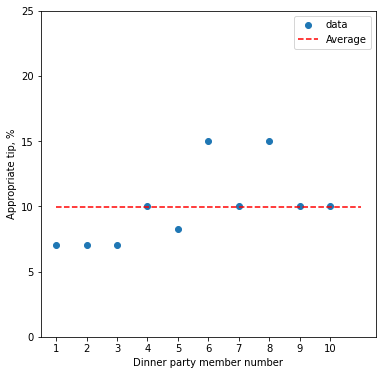

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(tip_dic.keys(), tip_dic.values(), label='data')

##calc avg
values=tip_dic.values()
av_tip=sum(values)/len(values)

print('The average tip based on each indiviudal assessment is %s'%(av_tip))

ax.hlines(xmin=0, xmax=10, y=av_tip, color='r', linestyle='--', label='Average')

ax.set_xlabel('Dinner party member number')
ax.set_ylabel('Appropriate tip, %')
ax.set_ylim([0, 25])
ax.legend()

## Summary

Here we have used the fuzzy system to assess the tip that should be provided based on quality of service and food for a number of individuals. The algorithm assesses each individual party member and then calculates the tip based on the average of the group. 

# 2. Fuzzy classification

Fuzzy classification is the process of grouping elements into a fuzzy set where the membership of each set is defined by the 'truth' value of a fuzzy propositional [function](https://en.wikipedia.org/wiki/Fuzzy_classification).


## Import modules

In [16]:
!pip install FuzzyClassificator
!pip install fuzzy

     |████████████████████████████████| 546 kB 5.3 MB/s 
  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp37-cp37m-linux_x86_64.whl size=161772 sha256=2f8f6932c61595fef61991ad18bcc8283f06fba9833528d92605b36ab71a53c0
  Stored in directory: /root/.cache/pip/wheels/c8/52/8a/bb2d05fbf343752a8546682cb5b2d775cc0d1f27f6c43f95dd
Successfully built fuzzy


In [17]:
from fuzzy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import numpy as np
from matplotlib import animation
import os
import io
import base64
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Access the dataset

In [18]:
# mount drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
## data path in Drive
iris_data = '/content/drive/MyDrive/Colab Notebooks/ML_APP_UL/WEEK_3/iris.csv'

In [20]:
# read iris_data file
df = pd.read_csv(iris_data)
# adding labels to columns
df.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# raw dataset show first 5 rows
df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [21]:
##CHECK FOR NAN cells
non=df[df.isna().any(axis=1)]
print('There are %s rows missing data'%(len(non)))

There are 0 rows missing data


## Binary classification 

In this section we will run binary classification on three different sets: <br>
bin1='Iris-setosa' , 'Iris-versicolor' only <br>
bin2='Iris-versicolor' , 'Iris-virginica' only <br>
bin3='Iris-setosa' , 'Iris-virginica' only

In [22]:
##REMOVE IRIS-VIRGINICA

## convert it into binary classification problem
# in this case 'Iris-virginica' is removed
bin1 = df.copy()[~(df['class']=='Iris-virginica')]
bin2 = df.copy()[~(df['class']=='Iris-setosa')]
bin3 = df.copy()[~(df['class']=='Iris-versicolor')]
##show only two classes are present
print('The first binary class looks at: ', bin1['class'].unique())
print('The second binary class looks at: ', bin2['class'].unique())
print('The third binary class looks at: ', bin3['class'].unique())

The first binary class looks at:  ['Iris-setosa' 'Iris-versicolor']
The second binary class looks at:  ['Iris-versicolor' 'Iris-virginica']
The third binary class looks at:  ['Iris-setosa' 'Iris-virginica']


For each of the bins we will assign a class value of '0' or '1' for the different classes

In [23]:
bin_list=[bin1, bin2, bin3]

for j, bin in enumerate(bin_list):
  cbin=bin_list[j]
  unique_list=cbin['class'].unique()
  for i, u in enumerate(unique_list):
    cbin.replace(to_replace=u, value=i, inplace=True)
  ##CHANGE THE BIN LIST 
  bin_list[j]=cbin

  

In [24]:
##CHECK THIS HAS WORKED AS PLANNED
print('The first binary class looks at: ', bin1['class'].unique())
print('The second binary class looks at: ', bin2['class'].unique())
print('The third binary class looks at: ', bin3['class'].unique())

##FIND NAN
for i, bin in enumerate(bin_list):
  non=bin[bin.isna().any(axis=1)]
  print('There are %s rows missing data in bin number %s'%(len(non), i+1))

The first binary class looks at:  [0 1]
The second binary class looks at:  [0 1]
The third binary class looks at:  [0 1]
There are 0 rows missing data in bin number 1
There are 0 rows missing data in bin number 2
There are 0 rows missing data in bin number 3


## Normalising the data

Here we normalise the datasets so that all values fall into the range 0-1. To achive this we will use sklearn's min max scaler. To run the data in a loop (as all three bins need to be normalised identically) we enumeratate the bin_list. The normalised dataset is then assigned a 'key' value based on it's location in the enumerated list: bin1 is first so it has a 'j=0' value we will save it in the sdata dictionary as 'j+1' so that the key reflects the bin number. This allows us to ensure that the normalised dataset can be compared with the original dataset if required. 

In [25]:
scaler=MinMaxScaler()

sdata={}

for j, bin in enumerate(bin_list):
  c_data=bin['class']
  ##drop class column to get data only
  data=bin.drop(columns=['class'])
  ##scale the data
  sd=scaler.fit_transform(data)
  ##combine scaled data to pd
  df=pd.DataFrame(sd, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
  ##ADD CLASS DATA BACK INTO THE DATAFRAME
  final=pd.concat([c_data, df], axis=1).dropna()
  ##CHECK FOR MISSING ROWS
  non=final[final.isna().any(axis=1)]
  if len(non)>1:
    print('YOU HAVE MISSING DATA IN BIN', str(j))
  ##SEND SCALED DF TO SDATA
  sdata[j+1]=final

## Splitting data into training and test sets

Here we use sklearn's train_test_split function to split the dataset into a training set and a test set. As we have not set any specific sizes the default test size of 25% original dataset size will be used. Data is automatically shuffled prior to the split to ensure classs labels are well mixed.

Again we have used a loop to keep track of which dataset we're analysing. The split data are sent to a new dictionary (tt_dic) where the key is a tuple. Each tuple contains the dataset variable 1-3 representing the 'bin' number and a label 'X_train' or 'X_test' defining the appropriate data.

In [46]:

tt_dic={}
for k in sdata.keys():
  ##get the entire dataset
  df=sdata[k]
  ##separate class from data
  c_data=df['class'].values
  v_data=df.drop(columns=['class']).values
  ##split into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(v_data, c_data)
  ##ADD TRAINING/TEST DATA TO SDATA DICTIONARY
  tt_dic[(k, 'X_train')]=X_train
  tt_dic[(k, 'X_test')]=X_test
  tt_dic[(k, 'y_train')]=y_train
  tt_dic[(k, 'y_test')]=y_test



In [47]:
for k in tt_dic.keys():
  df=tt_dic[k]
  print('Bin number is %s and data type is %s. The shape is %s' %(k[0], k[1], df.shape))

Bin number is 1 and data type is X_train. The shape is (74, 4)
Bin number is 1 and data type is X_test. The shape is (25, 4)
Bin number is 1 and data type is y_train. The shape is (74,)
Bin number is 1 and data type is y_test. The shape is (25,)
Bin number is 2 and data type is X_train. The shape is (38, 4)
Bin number is 2 and data type is X_test. The shape is (13, 4)
Bin number is 2 and data type is y_train. The shape is (38,)
Bin number is 2 and data type is y_test. The shape is (13,)
Bin number is 3 and data type is X_train. The shape is (36, 4)
Bin number is 3 and data type is X_test. The shape is (13, 4)
Bin number is 3 and data type is y_train. The shape is (36,)
Bin number is 3 and data type is y_test. The shape is (13,)


In [48]:
print(tt_dic[(1, 'X_train')][0])
print(tt_dic[(2, 'X_train')][0])
print(tt_dic[(3, 'X_train')][0])

[0.44444444 0.20833333 0.73170732 0.70588235]
[0.6        0.72222222 0.69230769 0.73333333]
[0.22222222 0.54545455 0.08474576 0.04166667]


## Animating the data

Here we use Enrique's code to animate the classification process - i.e. saving 2D image outputs in a time loop. 

In [49]:
class Animator:
	'''
	An animator class only for animating 2D hyperboxes
	'''

	def __init__(self, box_history, train_patterns, classes, frame_rate, exp_bound, sensitivity,
				 filename='fuzzy_animation', verbose=True):
		# TODO: Customizable parameters
		assert len(box_history) == len(train_patterns), '{} (box-history) != {} (train_patterns)'.format(len(box_history), len(train_patterns))
		assert len(train_patterns[0][0]) == 2, 'Only 2D points are allowed.'

		self.fig = plt.figure()
		self.fig.set_dpi(100)
		self.fig.set_size_inches(7, 6.5)
		self.fig.suptitle('Fuzzy min-max classifier')
		if filename == '':
			filename = 'fuzzy_animation'
		self.filename = filename + '.mp4'
		self.box_history = box_history
		self.train_patterns = train_patterns
		self.classes = classes
		self.verbose = verbose

		self.frames = np.ravel(np.array([[i]*frame_rate for i in range(len(box_history))]))
		self.total = len(box_history)

		self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
		self.ax.set_title('θ = {} and γ = {}'.format(exp_bound, sensitivity))
		self.rectangles = []
		self.scatters = []
		self.colormap = [np.array([255, 0, 0]), np.array([0, 0, 255])] + [self.__get_random_color(color) for i in range(len(np.unique(classes)) - 2)]

		for i in range((len(train_patterns))):
			x, y = train_patterns[i]
			y = int(y)
			if y == 0:
				self.scatters.append(plt.scatter(-1, -1, c=tuple(self.colormap[y] / 255)))

			else:
				self.scatters.append(plt.scatter(-1, -1, c=tuple(self.colormap[y] / 255)))
    
		for _class in classes:
			if _class == 0:
				self.rectangles.append(plt.Rectangle((0, 0), 0, 0, fill=False, color='r')) 
			else:
				self.rectangles.append(plt.Rectangle((0, 0), 0, 0, fill=False, color='b'))

		if self.verbose:
			print('{:<20}: {:<10}'.format('Total Boxes', len(self.rectangles)))
			print('{:<20}: {:<10}'.format('Points to plot', len(self.scatters)))


	def __get_random_color(self):
		r = lambda: random.randint(0,255)
		return np.array([r(), r(), r()])


	def box_to_rect(self, box):
		vj, wj = box
		height = wj[1] - vj[1]
		width = wj[0] - vj[0]
		return tuple(vj), width, height


	def init(self):
		for i in self.rectangles:
			self.ax.add_patch(i)

		return tuple(self.rectangles) + tuple(self.scatters)


	def _animate(self, i):
		hyperboxes = self.box_history[i]
		# Plot training point
		x, y = self.train_patterns[i]
		self.scatters[i].set_offsets(tuple(x))
		for box in range(len(hyperboxes)):
			base, width, height = self.box_to_rect(hyperboxes[box])
			self.rectangles[box].set_xy(base)
			if width == 0:
				width = 0.02
			if height == 0:
				height = 0.02

			self.rectangles[box].set_width(width)
			self.rectangles[box].set_height(height)

		if self.verbose:
			print('{:<20}: {}/{}'.format('Animating frame', i+1, self.total), end='\r')

		return tuple(self.rectangles) + tuple(self.scatters)


	def animate(self):
		'''
		Main function to start animation
		'''

		anim = animation.FuncAnimation(self.fig, self._animate, 
							   init_func = self.init, 
							   frames = self.frames, 
							   interval = 20,
							   blit = True)

		anim.save(self.filename, fps=30, 
				  extra_args=['-vcodec', 'h264', 
							  '-pix_fmt', 'yuv420p'])

		if self.verbose:
			print('Animation complete! Video saved at {}'.format(os.path.join(os.getcwd(), self.filename)))

In [50]:
class FuzzyMMC:

	def __init__(self, sensitivity=1, exp_bound=1, animate=False):
		'''
		Constructor for FuzzyMMC class
		'''
		self.sensitivity = sensitivity
		self.hyperboxes = None
		self.isanimate = animate
		self.classes = np.array([])
		self.exp_bound = exp_bound

		if self.animate:
			self.box_history = []
			self.train_patterns = []


	def membership(self, pattern):
		'''
		Calculates membership values a pattern
		
		Returns an ndarray of membership values of all hyperboxes
		'''
		min_pts = self.hyperboxes[:, 0, :]
		max_pts = self.hyperboxes[:, 1, :]
		
		a = np.maximum(0, (1 - np.maximum(0, (self.sensitivity * np.minimum(1, pattern - max_pts)))))
		b = np.maximum(0, (1 - np.maximum(0, (self.sensitivity * np.minimum(1, min_pts - pattern)))))

		return np.sum(a + b, axis=1) / (2 * len(pattern))


	def overlap_contract(self, index):
		'''
		Check if any classwise dissimilar hyperboxes overlap
		'''
		contracted = False
		for test_box in range(len(self.hyperboxes)):

			if self.classes[test_box] == self.classes[index]:
				# Ignore same class hyperbox overlap
				continue
	
			expanded_box = self.hyperboxes[index]
			box = self.hyperboxes[test_box]

			## TODO: Refactor for vectorization
			vj, wj = expanded_box
			vk, wk = box

			delta_new = delta_old = 1
			min_overlap_index = -1
			for i in range(len(vj)):
				if vj[i] < vk[i] < wj[i] < wk[i]:
					delta_new = min(delta_old, wj[i] - vk[i])

				elif vk[i] < vj[i] < wk[i] < wj[i]:
					delta_new = min(delta_old, wk[i] - vj[i])

				elif vj[i] < vk[i] < wk[i] < wj[i]:
					delta_new = min(delta_old, min(wj[i] - vk[i], wk[i] - vj[i]))

				elif vk[i] < vj[i] < wj[i] < wk[i]:
					delta_new = min(delta_old, min(wj[i] - vk[i], wk[i] - vj[i]))

				if delta_old - delta_new > 0:
					min_overlap_index = i
					delta_old = delta_new

			if min_overlap_index >= 0:
				i = min_overlap_index
				# We need to contract the expanded box
				if vj[i] < vk[i] < wj[i] < wk[i]:
					vk[i] = wj[i] = (vk[i] + wj[i])/2

				elif vk[i] < vj[i] < wk[i] < wj[i]:
					vj[i] = wk[i] = (vj[i] + wk[i])/2

				elif vj[i] < vk[i] < wk[i] < wj[i]:
					if (wj[i] - vk[i]) > (wk[i] - vj[i]):
						vj[i] = wk[i]

					else:
						wj[i] = vk[i]

				elif vk[i] < vj[i] < wj[i] < wk[i]:
					if (wk[i] - vj[i]) > (wj[i] - vk[i]):
						vk[i] = wj[i]

					else:
						wk[i] = vj[i]

				self.hyperboxes[test_box] = np.array([vk, wk])
				self.hyperboxes[index] = np.array([vj, wj])
				contracted = True

		return contracted



	def train_pattern(self, X, Y):
		'''
		Main function that trains a fuzzy min max classifier
		Note:
		Y is a one-hot encoded target variable
		'''
		target = Y
		
		if target not in self.classes:
			
			# Create a new hyberbox
			if self.hyperboxes is not None:
				self.hyperboxes = np.vstack((self.hyperboxes, np.array([[X, X]])))
				self.classes = np.hstack((self.classes, np.array([target])))

			else:
				self.hyperboxes = np.array([[X, X]])
				self.classes = np.array([target])

			if self.isanimate:
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))
		else:
			
			memberships = self.membership(X)
			memberships[np.where(self.classes != target)] = 0
			memberships = sorted(list(enumerate(memberships)), key=lambda x: x[1], reverse=True)
			
			# Expand the most suitable hyperbox
			count = 0
			while True:
				index = memberships[count][0]
				min_new = np.minimum(self.hyperboxes[index, 0, :], X)
				max_new = np.maximum(self.hyperboxes[index, 1, :], X)
				
				if self.exp_bound * len(np.unique(self.classes)) >= np.sum(max_new - min_new):
					self.hyperboxes[index, 0] = min_new
					self.hyperboxes[index, 1] = max_new
					break
				else:
					count += 1

				if count == len(memberships):
					self.hyperboxes = np.vstack((self.hyperboxes, np.array([[X, X]])))
					self.classes = np.hstack((self.classes, np.array([target])))
					index = len(self.hyperboxes) - 1
					break

			# Overlap test
			if self.isanimate:
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))

			contracted = self.overlap_contract(index)
			
			if self.isanimate and contracted:	
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))


	def fit(self, X, Y):
		'''
		Wrapper for train_pattern
		'''
		for x, y in zip(X, Y):
			self.train_pattern(x, y)


	def predict(self, X):
		'''
		Predict the class of the pattern X
		'''
		classes = np.unique(self.classes)
		results = []
		memberships = self.membership(X)
		max_prediction = 0
		pred_class = 0
		for _class in classes:
			mask = np.zeros((len(self.hyperboxes),))
			mask[np.where(self.classes == _class)] = 1
			p = memberships * mask
			prediction, class_index = np.max(p), np.argmax(p)
			if prediction > max_prediction:
				max_prediction = prediction
				pred_class = class_index

		return max_prediction, self.classes[pred_class] 


	def score(self, X, Y):
		'''
		Scores the classifier
		'''
		count = 0
		for x, y in zip(X, Y):
			_, pred = self.predict(x)
			if y == pred:
				count += 1

		return count / len(Y)


	def animate(self, frame_rate=10, filename='', verbose=True):
		'''
		To make a video of the classifier training.
		NOTE: Only possible when working with 2 dimensional patterns
		'''
		if self.isanimate:
			animator = Animator(box_history=self.box_history,
								train_patterns=self.train_patterns,
								classes=self.classes,
								frame_rate=frame_rate,
								exp_bound=self.exp_bound,
								sensitivity=self.sensitivity,
								filename=filename,
								verbose=verbose)

			animator.animate()

			return animator.filename

		else:
			raise Exception('No animation data was collected! Create a fuzzy classifier instance with animate=True')

## Here we apply the fuzzy classifer to our datasets

In [51]:
for k in range(1, 4, 1):
  print(k)
  ##classify
  clf=FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=True)
  tt_dic[(k, 'CLF')]=clf
  ##fit the data
  clf.fit(tt_dic[(k, 'X_train')], tt_dic[(k, 'y_train')])
  ##add the training score to the tt_dic so we can track
  tt_dic[(k, 'SCORE')]=clf.score(tt_dic[(k, 'X_test')], tt_dic[(k, 'y_test')])

1
2
3


In [52]:
 for i in range(1, 4, 1):
  print('The score for bin %s is %s' %(i, tt_dic[i, 'SCORE']))

The score for bin 1 is 1.0
The score for bin 2 is 1.0
The score for bin 3 is 1.0


In [53]:
##ATTEMPTED TO RUN ANIMATION SEVERAL TIMES BUT CAN'T GET IT TO RUN.
##ASKING FOR 2D POINTS. I CAN'T TELL FROM ENRIQUES CODE EXACTLY WHAT
##DATA AND FORM OF DATA IS GOING TO THE ANIMATOR... 


_=tt_dic[(1, 'CLF')].animate()

AssertionError: ignored

I tried to animate the results several times but kept running into issue with data form. As clf outputs an object I can't tell from the attribute list exactly what form the data are in. This has resulted in no animated videos of the classifier. I also tried to build a confusion matrix but the classifer doesn't hold the predicted classes in an array format. 

# Multi-classification 

Here we read in again the original Iris dataset. We normalise it using MinMaxScaler. We set the class labels as numerics where each numeric value (0, 1, 2) represents a class ('Iris-setosa' 'Iris-versicolor' 'Iris-virginica')

## Import statements for multi-classifcation

In [34]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.decomposition import PCA

## Read in data and preform modifications (max min scaler)

In [35]:
# read iris_data file
df = pd.read_csv(iris_data)
# adding labels to columns
df.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# raw dataset show first 5 rows
df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [36]:
##Separate the X and y data
X_data=df.copy().iloc[:, 0:-1]
y_data=df.copy().iloc[:, -1]

In [37]:
##NORMALISE THE X DATA USING MINMAXSCALER
scaler=MinMaxScaler()
X_data_scaled=scaler.fit_transform(X_data)
# print(X_data_scaled)
##REPLACE CLASS LABELS WITH NUMERALS
unique_list=y_data.unique()
print(unique_list)
for i, val in enumerate(unique_list):
  y_data.replace(to_replace=val, value=i, inplace=True)

##MODIFED DF
X_df=pd.DataFrame(X_data_scaled, columns=X_data.columns)
mod_df=pd.concat([y_data, X_df], axis=1)
mod_df

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,class,sepal-length,sepal-width,petal-length,petal-width
0,0,0.166667,0.416667,0.067797,0.041667
1,0,0.111111,0.500000,0.050847,0.041667
2,0,0.083333,0.458333,0.084746,0.041667
3,0,0.194444,0.666667,0.067797,0.041667
4,0,0.305556,0.791667,0.118644,0.125000
...,...,...,...,...,...
144,2,0.666667,0.416667,0.711864,0.916667
145,2,0.555556,0.208333,0.677966,0.750000
146,2,0.611111,0.416667,0.711864,0.791667
147,2,0.527778,0.583333,0.745763,0.916667


##Visualise the data to get some idea of what's happening

[0 1 2]


Text(0, 0.5, 'Ratio of petal-length to petal-width')

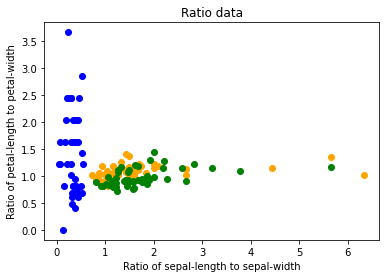

In [38]:
##LETS PLOT THE DATASET AND SEE WHAT'S HAPPENING
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
##FIRST LETS REDUCE THE DATA FROM 4 VARIABLES TO 2 JUST FOR PLOTTING PURPOSES
check=mod_df.copy()
check['SEPAL_RATIO']=check['sepal-length']/check['sepal-width']
check['PETAL_RATIO']=check['petal-length']/check['petal-width']

# Visualize the test data
fig0, ax0 = plt.subplots()
print(check['class'].unique())
for i, label in enumerate(check['class'].unique()):
    x=check.loc[check['class']==label]['SEPAL_RATIO']
    y=check.loc[check['class']==label]['PETAL_RATIO']
    ax0.scatter(x, y, color=colors[label])
ax0.set_title('Ratio data')
ax0.set_xlabel('Ratio of sepal-length to sepal-width')
ax0.set_ylabel('Ratio of petal-length to petal-width')

## Principal component analysis (PCA)

PCA is a tool that allows us to reduce the dimensionality of feature list. Above we've shown that the four dimensional dataset can be reduced down to two features using simple ratio formula. However there is no indication that this is the best method of reducing the dataset - perhaps the ratio between sepal and petal would be a better measure? PCA allows the user to specify the number of components they would like to transform the data too. In our case, to make life simplier in terms of visualisation we're going to select two dimensional data. 

In [39]:
##modify mod_df too two principal features using PCA
pca=PCA(n_components=2)
pC=pca.fit_transform(mod_df.iloc[:, 1:])

decomp_df=pd.DataFrame(data=pC, columns=['PC1', 'PC2'])
decomp_df=pd.concat([decomp_df, y_data], axis=1)
decomp_df

,PC1,PC2,class
0,-0.627995,-0.098085,0
1,-0.674139,-0.044837,0
2,-0.659109,-0.096438,0
3,-0.652166,0.139889,0
4,-0.537587,0.295282,0
...,...,...,...
144,0.547652,0.058451,2
145,0.401643,-0.172460,2
146,0.443140,0.036701,2
147,0.485268,0.148838,2


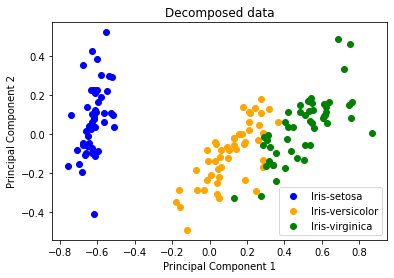

In [40]:
##LETS PLOT THE DATASET AND SEE WHAT'S HAPPENING
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
##FIRST LETS REDUCE THE DATA FROM 4 VARIABLES TO 2 JUST FOR PLOTTING PURPOSES

# Visualize the test data
fig0, ax0 = plt.subplots()
for i, label in enumerate(decomp_df['class'].unique()):
    x=decomp_df.loc[decomp_df['class']==label]['PC1']
    y=decomp_df.loc[decomp_df['class']==label]['PC2']
    ax0.scatter(x, y, color=colors[label], label=unique_list[label])
ax0.set_title('Decomposed data')
ax0.set_xlabel('Principal Component 1')
ax0.set_ylabel('Principal Component 2')

plt.legend()

## SPLITTING DATA INTO TEST AND TRAIN
Here we split the datasets into testing and training datasets using sklearn split_test_train

In [41]:
##split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(decomp_df.iloc[:, [0, 1]], decomp_df.iloc[:, -1])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(type(X_train))

(111, 2) (111,) (38, 2) (38,)
<class 'pandas.core.frame.DataFrame'>


## How many clusters should we have? 
The above data shows three distinct clusters but we can see that Iris-versicolor and Iris-virginica overlap significantly. We know that there are three classes but if we did not know there were three classes we could use clustering over a range of values to describe the dataset in different ways. Using this information we can then define the best number of clusters for a given dataset

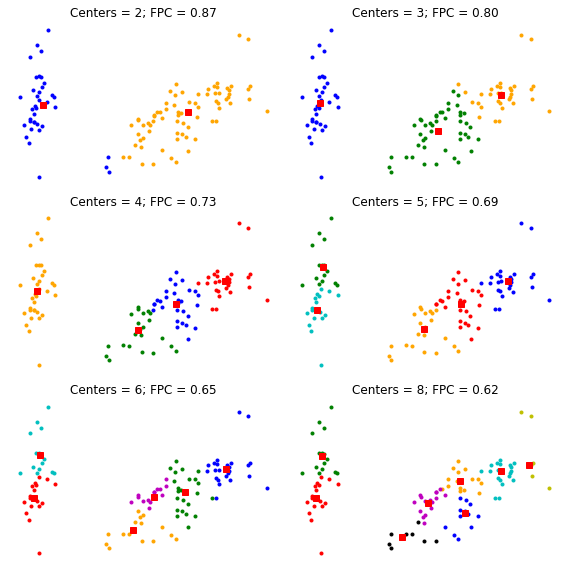

In [42]:
##DEFINE THE NUM OF CLUSTERS WE WANT TO CHECK
cluster_list=[2, 3, 4, 5, 6, 8]
x=X_train.iloc[:, 0].values
y=X_train.iloc[:, 1].values
alldata=np.vstack((x, y))
fpcs=[]

fig1, axes1 = plt.subplots(3, 2, figsize=(8, 8))

for nc, ax in enumerate(axes1.reshape(-1), 2):
  ncenters=cluster_list[(nc-2)]
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
  
  # Store fpc values for later
  fpcs.append(fpc)

  # Plot assigned clusters, for each data point in training set
  cluster_membership = np.argmax(u, axis=0)
  for j in range(ncenters):
      ax.plot(x[cluster_membership == j],
              y[cluster_membership == j], '.', color=colors[j])

  # Mark the center of each fuzzy cluster
  for pt in cntr:
      ax.plot(pt[0], pt[1], 'rs')

  ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
  ax.axis('off')

fig1.tight_layout()


Text(0, 0.5, 'Fuzzy partition coefficient')

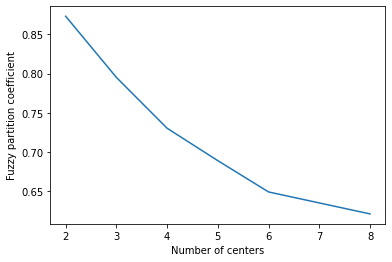

In [43]:
fig2, ax2 = plt.subplots()
ax2.plot(cluster_list, fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

As suspected based on visualisation the above plots show that both k=2 and k=3 produce high FPC values indicating that two and three clusters provide the best fit for the data

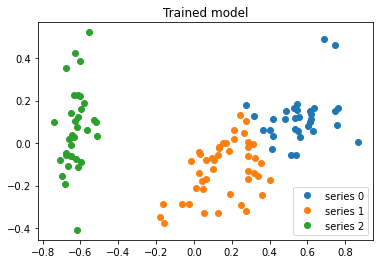

In [44]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

## Predicting the model
Using cmeans_predict we will assess the test data in comparison to the trained model above

In [45]:
x=X_test.iloc[:, 0].values
y=X_test.iloc[:, 1].values
newdata=np.vstack((x, y))

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()

plt.show()

ValueError: ignored

# Summary

Here we have investigated fuzzy logic and fuzzy classification. 

## Fuzzy logic
Fuzzy logic was applied to the tipping problem. We addressed what tip should be left at a restaurant based on a dinner party of ten people who experienced different levels of service and food quality. 

The most difficult aspect of the fuzzy logic problem was generating appropriate cross over in terms of the membership functions. You can see that my triangular sets are very skewed. It's not clear what affect this has on the algorithm. 

Future work for this assessment should involve a statistical analysis investigating the influence of changing membership function data. 

## Fuzzy Classification

In this Etivity we investigated fuzzy classification using both binary and multiclassification. 

Binary classification is useful for data that only has two or less classes. In reality most data are going to have multi-class possibilities. The ease of implementing binary classification however means it can be useful in getting a 'feel' for the data and the main parameters impacting outcomes. I had difficulty using Enriques animation code due to the dictionary format of my data and my inability to ascertain how Enrique's MCC and Animation classes called on one another. Not being able to visualise the data appropriately made analysing the outcome next to impossible. I attempted to create a confusion matrix to see whether I could gather some information about the prediction ability of the model but that was also unsuccessful.

Future work for this assessment should investigate why the animations did not work and generate appropriate visuallisation methods. 

Multi-class classification was carried out using fuzzy systems in conjunction with k-means algorithm. I found this difficult to follow particularly the use of vertically stacking the X data. It's not clear why this was neccessary to run K-means (though I suspect it has to do with how K-means accepts data). I also couln't figure out how the prediction would work.... Why does the test data need to be transposed before K-means? This is not clear. Future work in this area should focus on the implementation of K-means for multi-class fuzzy systems. 